In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

json = pd.read_json ('https://pomber.github.io/covid19/timeseries.json')

In [2]:
def plot_country(country):
    df = pd.json_normalize(json[country])
    diff = df[['confirmed']].diff()[1:]
    df = df[1:]
    discharged = df.recovered+df.deaths
    
    print(df.tail(1).to_string(index=False))
    print('new',diff.tail(1).to_string(index=False))

    plt.figure(figsize=(8,4))
    plt.plot(df.confirmed,label='confirmed')
    plt.plot(df.recovered,c='g',label='recovered')
    plt.plot(df.deaths,c='r',label='deaths')
    plt.plot(discharged,dashes=[2,2,6, 2],c='y',label='discharged')
    plt.title(country)
    plt.xlabel('day')
    plt.legend(loc='upper left')
    plt.show()
    
    plt.figure(figsize=(8,4))
    plt.scatter(df.confirmed,diff.confirmed)
    model = np.poly1d(np.polyfit(df.confirmed, diff.confirmed, 3))
    xp = np.linspace(df.confirmed.min(), df.confirmed.max(), 100)
    plt.plot(xp, model(xp), c='r')
    plt.title(country)
    plt.xlabel('confirmed')
    plt.ylabel('new confirmed per day')
    plt.show()
    
    print('discharged: ',discharged.iloc[-1])
    print('deaths: ',df.deaths.iloc[-1])
    print('%: ',(df.deaths.iloc[-1]/discharged.iloc[-1]*100))

    plt.figure(figsize=(8,4))
    plt.scatter(df.recovered+df.deaths,df.deaths)
    plt.title(country)
    plt.xlabel('discharged')
    plt.ylabel('deaths')
    plt.show()


date  confirmed  deaths  recovered
 2020-4-4       2067      20        674
new  confirmed
      89.0


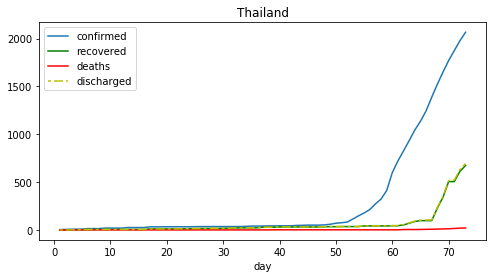

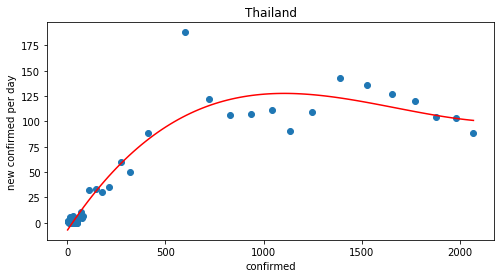

discharged:  694
deaths:  20
%:  2.881844380403458


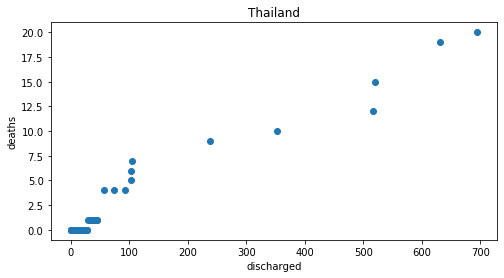

date  confirmed  deaths  recovered
 2020-4-4     308850    8407      14652
new  confirmed
   33264.0


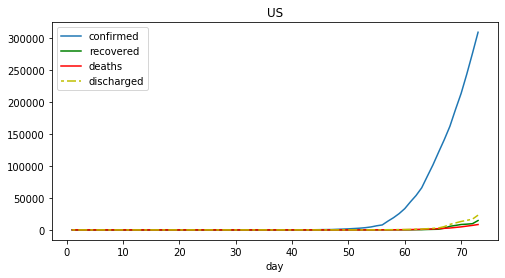

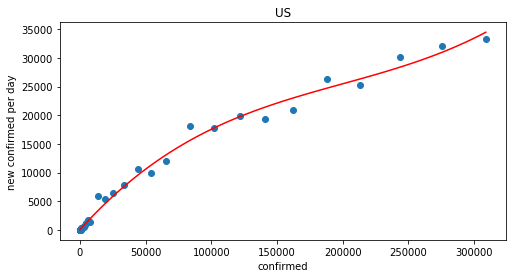

discharged:  23059
deaths:  8407
%:  36.458649551151396


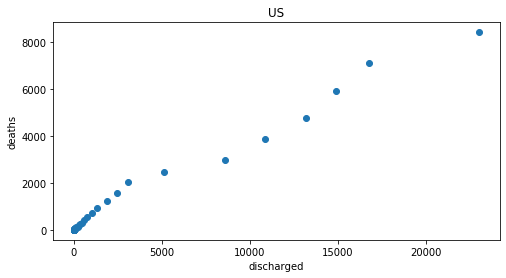

date  confirmed  deaths  recovered
 2020-4-4      82543    3330      76946
new  confirmed
      32.0


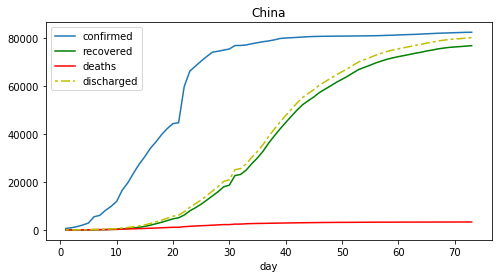

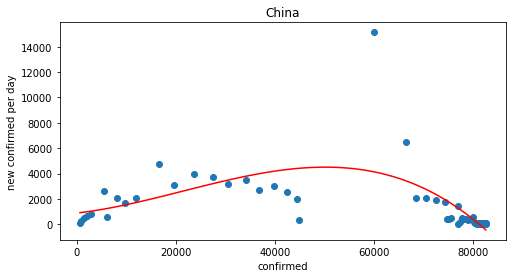

discharged:  80276
deaths:  3330
%:  4.148188748816583


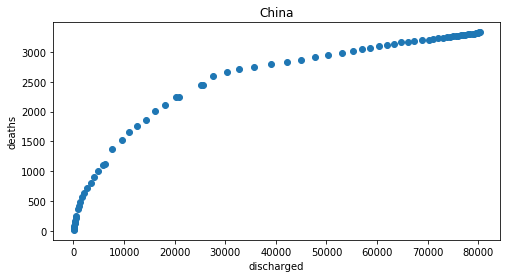

date  confirmed  deaths  recovered
 2020-4-4     124632   15362      20996
new  confirmed
    4805.0


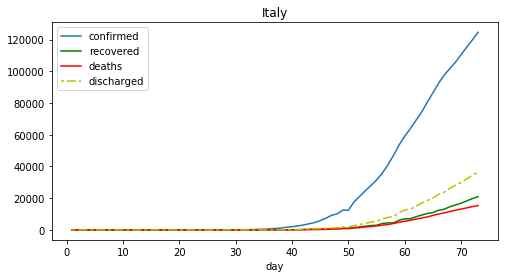

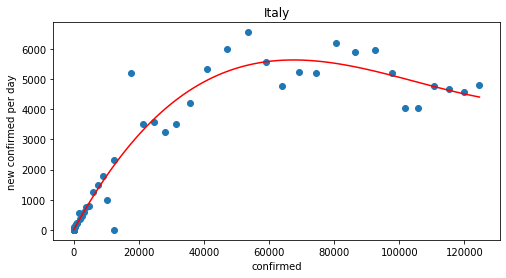

discharged:  36358
deaths:  15362
%:  42.252049067605476


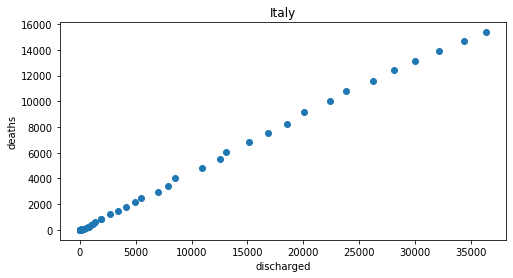

In [3]:
for c in ['Thailand','US','China','Italy']:
    plot_country(c)
